# Tutorial 5

## Question 1

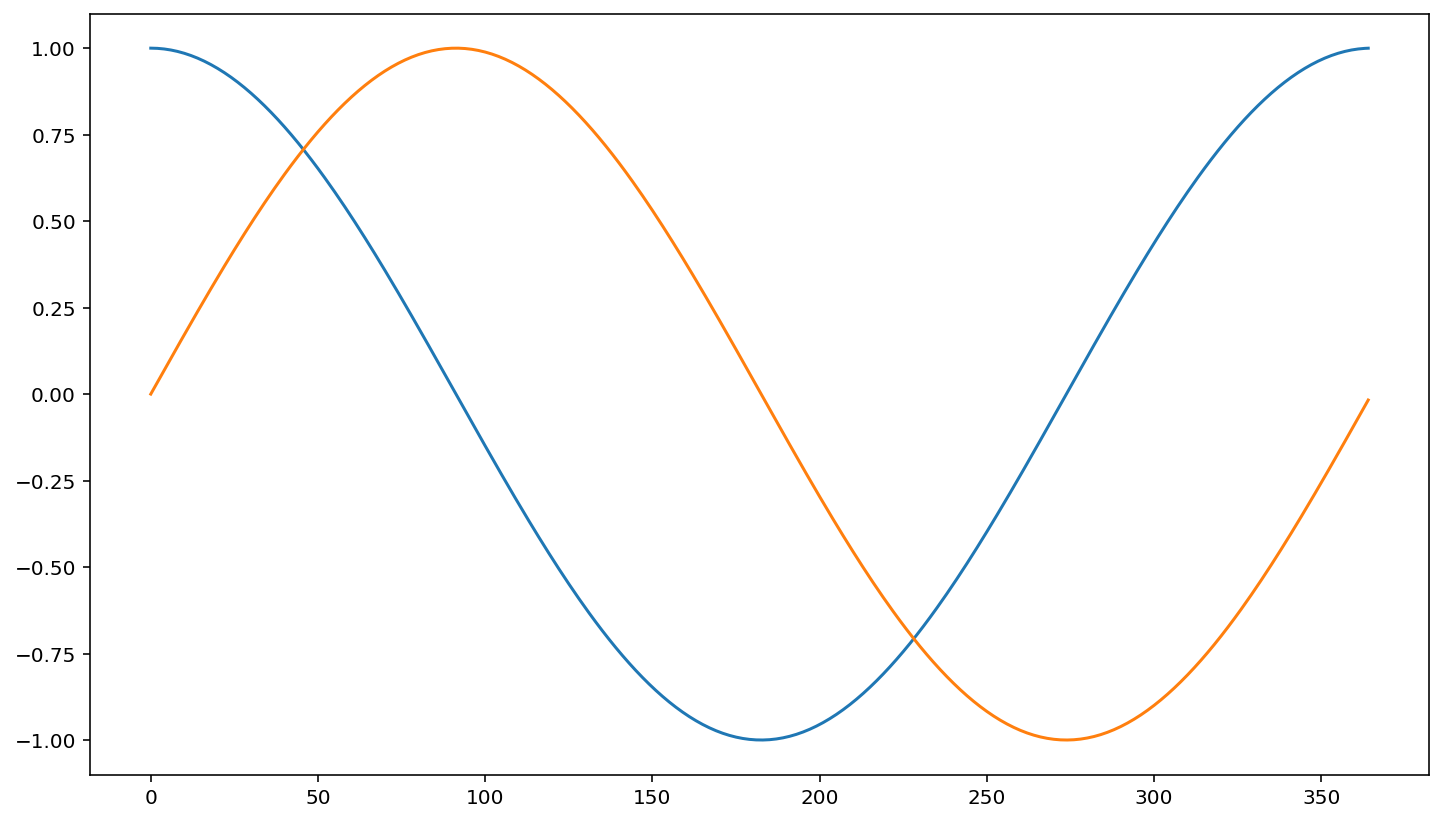

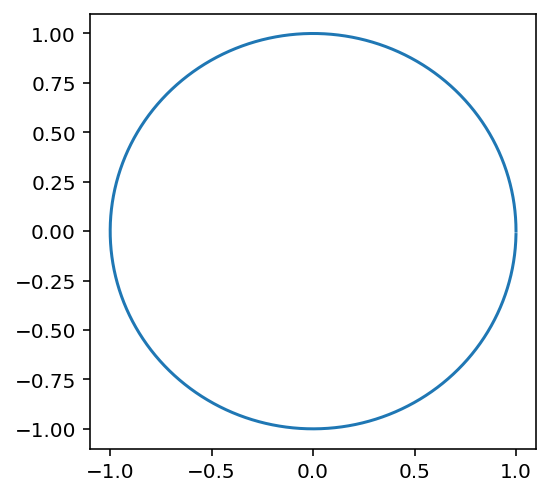

In [1]:
# 1

import numpy as np
import matplotlib.pyplot as plt

p = 365
d = 1
t = np.arange(0, 365)
x = d * np.cos(2*np.pi*t/p)
y = d * np.sin(2*np.pi*t/p)

plt.plot(t, x)
plt.plot(t, y)

plt.figure(figsize=(4,4))
plt.plot(x, y)

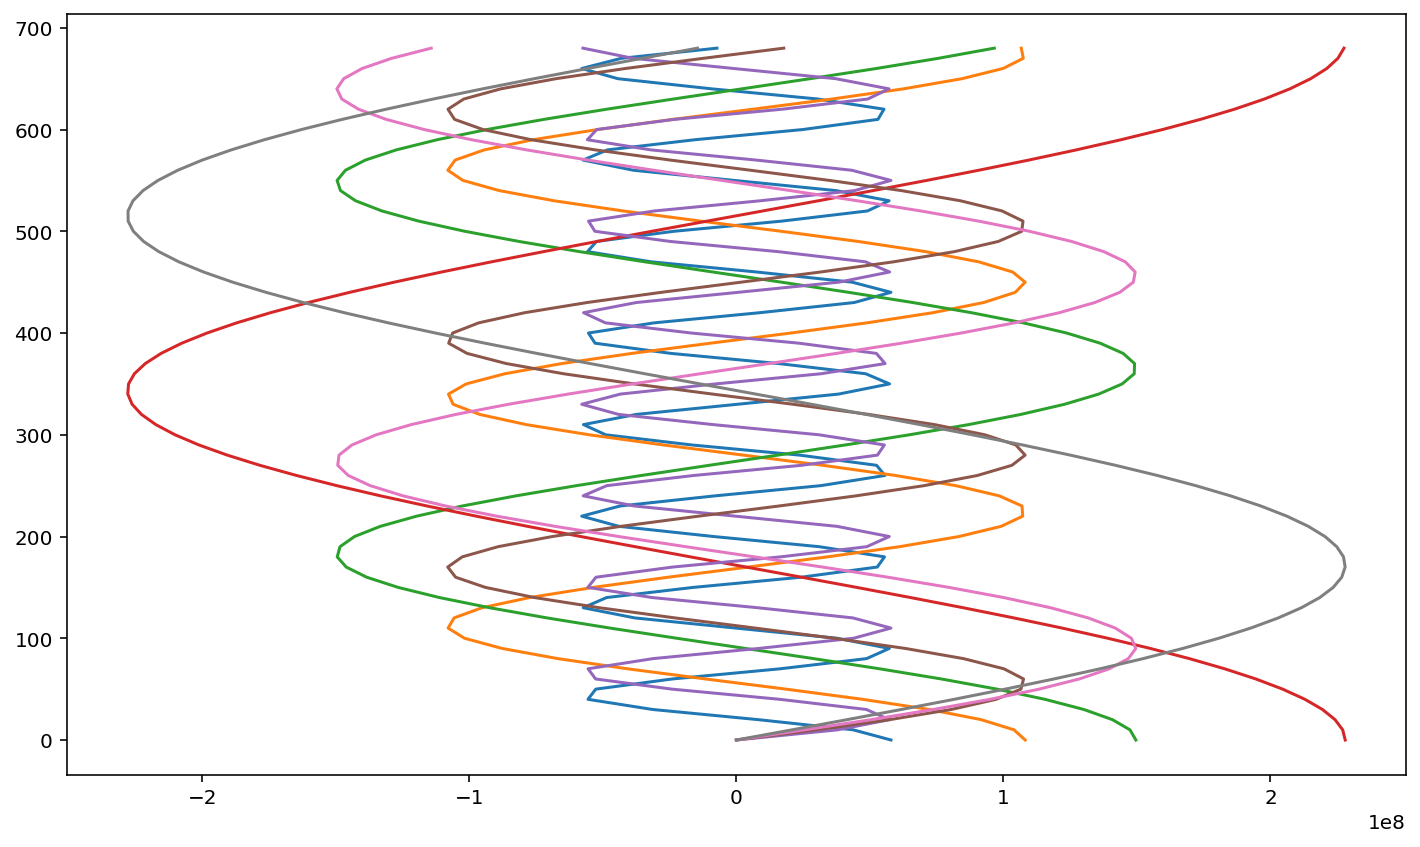

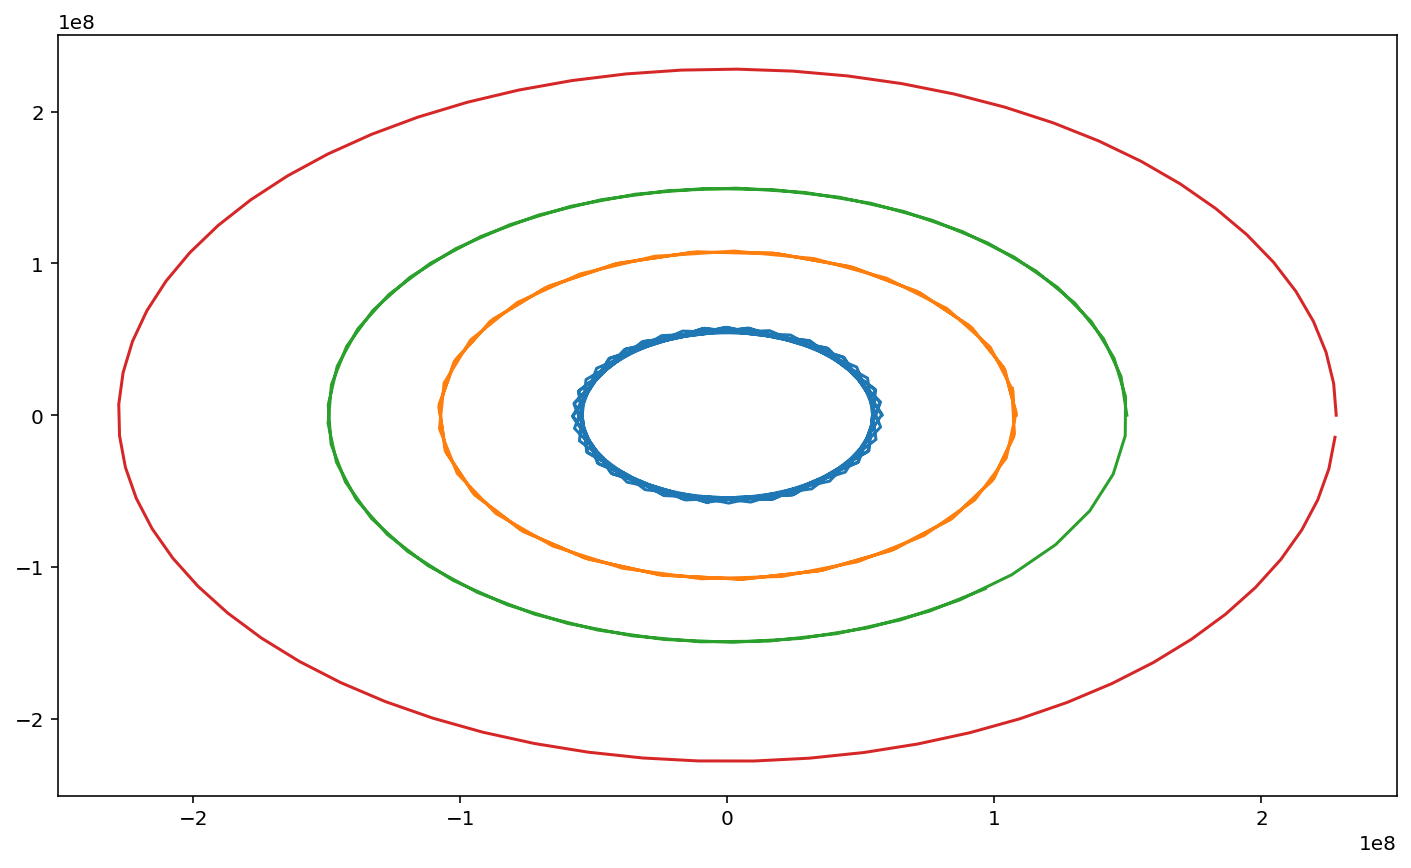

In [2]:
# 2

import numpy as np
from matplotlib import animation
from IPython.display import HTML, display
import random

## Inner planets: Using arrays and for loops

au = 1.496e8
year = 365.256

# Inner planets only
distances = np.array([[0.387, 0.723, 1, 1.524]]) * au
periods = np.array([[87.969, 224.701, 1*year, 686.98]])

# Make animation last for full orbit of Mars, 10 day intervals
# (N.B.: [:, np.newaxis] is needed for succesful broadcasting)
t = np.arange(0, np.amax(periods), 10)[:, np.newaxis]

# Compute orbital coordinates
x_planets = distances * np.cos(2*np.pi*t/periods)
y_planets = distances * np.sin(2*np.pi*t/periods)

plt.figure()
plt.plot(x_planets, t)
plt.plot(y_planets, t)

plt.figure()
plt.plot(x_planets, y_planets)


In [3]:
# Set up figure
filename = "animation.gif"
interval = 100
frames = len(t)

def ganimate(frame):
    plt.cla()
    
    # Plot a yellow circle in the middle to represent the Sun
    plt.plot(0,0, 'oy')
    
    # For each planet, plot its current position for the frame
    for p in range(max(periods.shape)):
        plt.scatter(x_planets[frame, p], y_planets[frame, p])
    
    # Set axis limits to correspond to the minimum and maximum x and y positions
    # out of all planet orbits
    plt.xlim(np.amin(x_planets), np.amax(x_planets))
    plt.ylim(np.amin(y_planets), np.amax(y_planets))
    
fig = plt.figure(figsize=(5, 5))

anim = animation.FuncAnimation(fig, ganimate, frames=frames, interval=interval)
anim.save(filename, writer='imagemagick')
plt.close()

__counter__ = str(random.randint(0,2e9))
display(HTML('<img src="' + filename + '?' + __counter__ + '">'))

![](animation.gif)
## Question 2

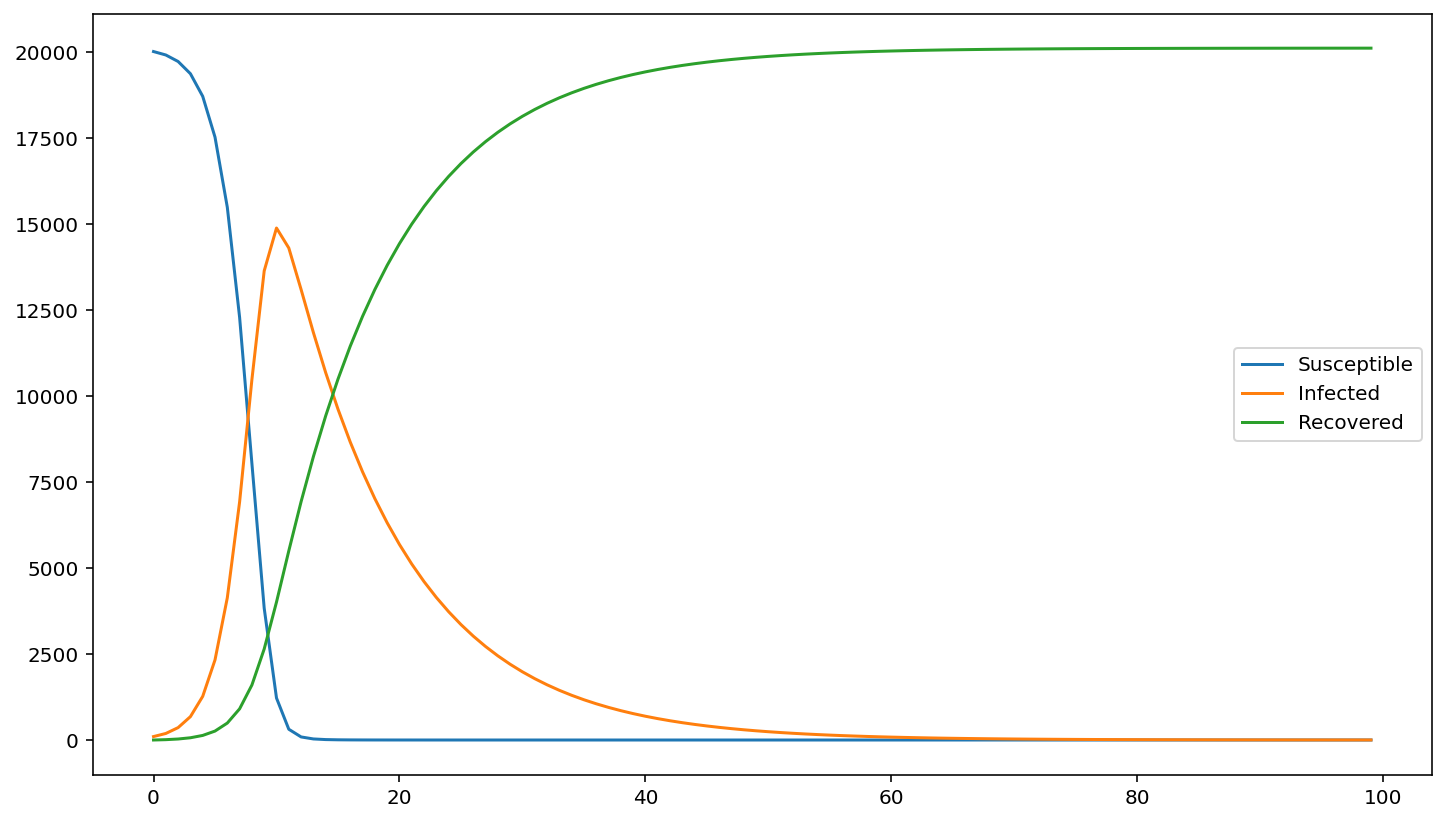

In [4]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.1
b = 0.00005
S_0 = 20000
I_0 = 100
n_days = 100

t = np.arange(0, n_days, 1)
S = np.zeros(n_days)
I = np.zeros(n_days)
S[0] = S_0
I[0] = I_0


for i in range(n_days - 1):
    S[i+1] = S[i] - b * S[i] * I[i]
    I[i+1] = I[i] + b * S[i] * I[i] - a * I[i]
    
R = S_0 + I_0 - S - I
    
plt.plot(t, S, label="Susceptible")
plt.plot(t, I, label="Infected")
plt.plot(t, R, label="Recovered")

plt.legend()

In [5]:
def max_I(a, b):
    
    t_max = 100
    S_0 = 20000
    I_0 = 100
    t = np.arange(t_max)
    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)

    S[0] = S_0
    I[0] = I_0
    for i in range(t_max - 1):
        S[i+1] = S[i] - b * S[i] * I[i]
        I[i+1] = I[i] + b * S[i] * I[i] - a * I[i]
    
    return np.max(I)

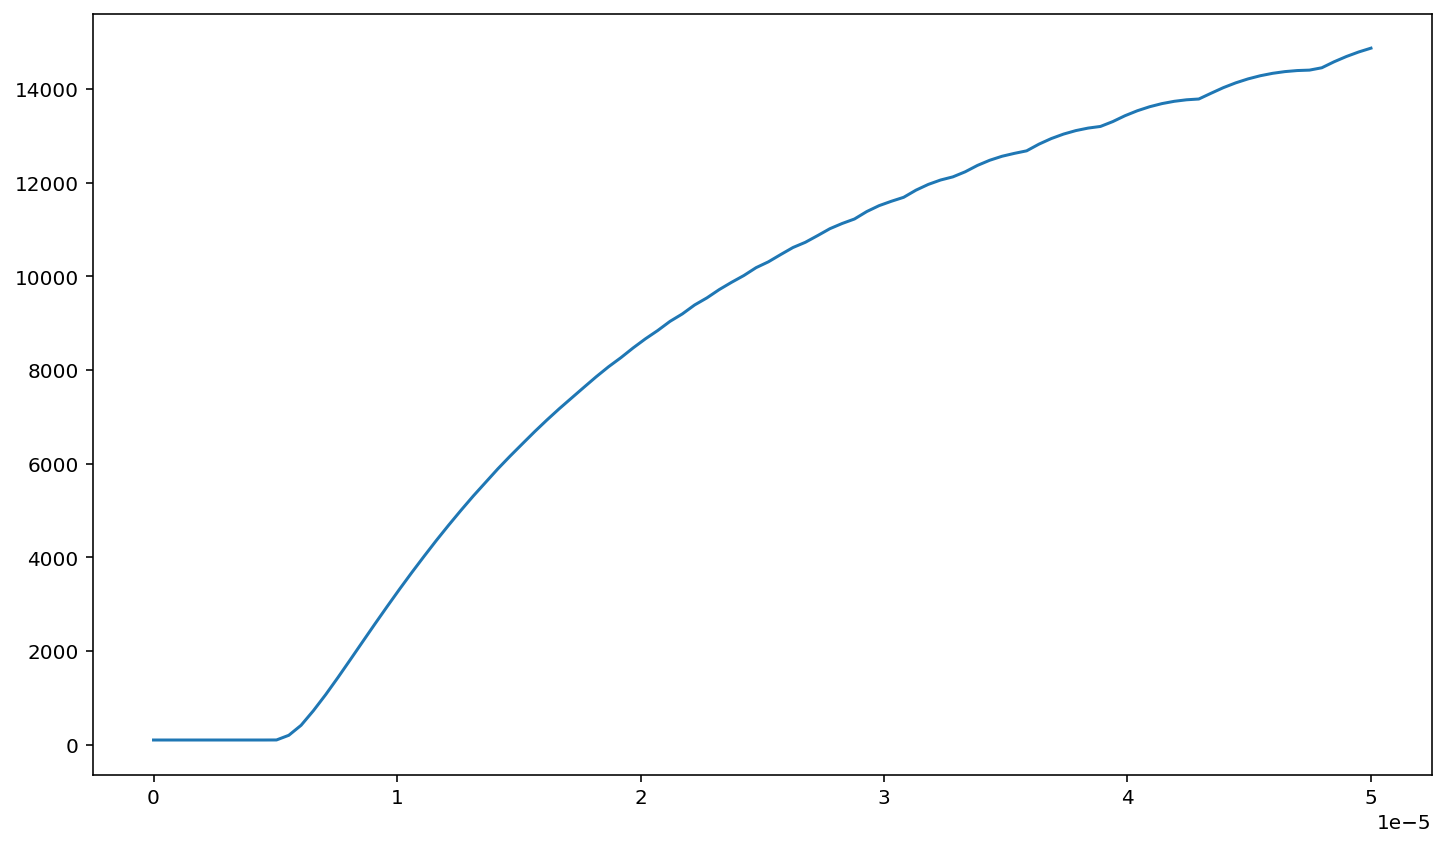

In [6]:
n = 100
b_vals = np.linspace(0, 0.00005, n)
b_vals

peak_I = np.zeros(n)

for i in range(n):
    b = b_vals[i]
    peak_I[i] = max_I(a, b)
    
plt.plot(b_vals, peak_I)